In [ ]:
#### Домашнее задание: 
#### задание для самостоятельной реализации по cross validation (nested k -fold)
#### сформулировать и решить задачу классификации на случайных данных при помощи SVC,
#### тренировку проводить и измерять качество модели c помощью nested k-folds
#### визуализировать ошибку и результаты предсказания

In [1]:

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV


In [2]:
#Создание случайных данных 
X, y = make_classification(
    
    n_samples=1000,  # Количество объектов
    n_features=20,   # Количество признаков
    n_informative=10,  # Число информативных признаков
    n_redundant=5,   # Число избыточных признаков
    n_classes=2,     # Число классов
    random_state=42
)

svc = SVC()

#Определение внешней и внутренней кросс-валидации
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


In [6]:
#Определение сетки гиперпараметров для настройки модели
param_grid = {
    'C': [0.1, 1, 10, 100],    # Регуляризация
    
    'kernel': ['linear', 'rbf'],  # Тип ядра
    'gamma': ['scale', 'auto']   # Параметр gamma для rbf ядра
}

#Вложенная кросс-валидация с использованием GridSearchCV
scores = []  # Для хранения оценок на внешних фолдах

for train_index, test_index in outer_cv.split(X, y):
    
    

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    # GridSearchCV для внутреннего поиска гиперпараметров
    grid_search = GridSearchCV(
        estimator=svc, 
        
        param_grid=param_grid, 
        scoring='accuracy', 
        cv=inner_cv
    )
    grid_search.fit(X_train, y_train)
    
    # Оцениваем качество на тестовой выборке внешнего фолда
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)


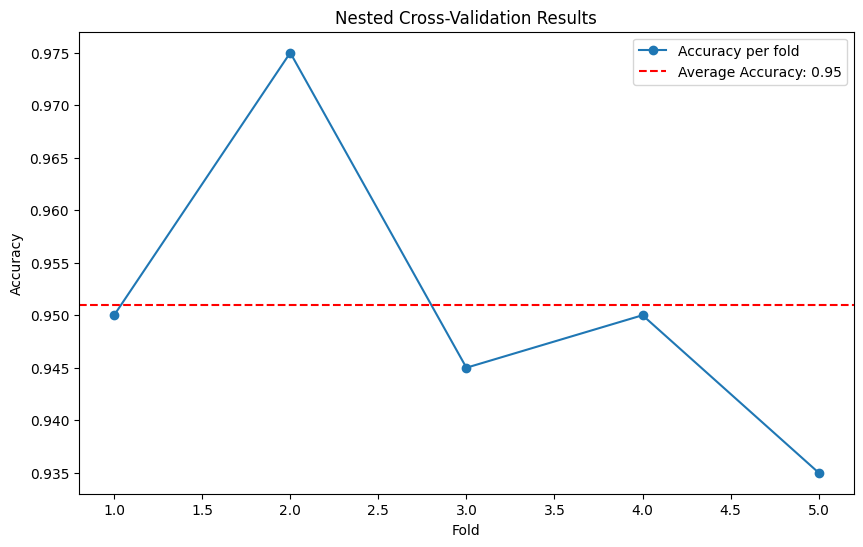

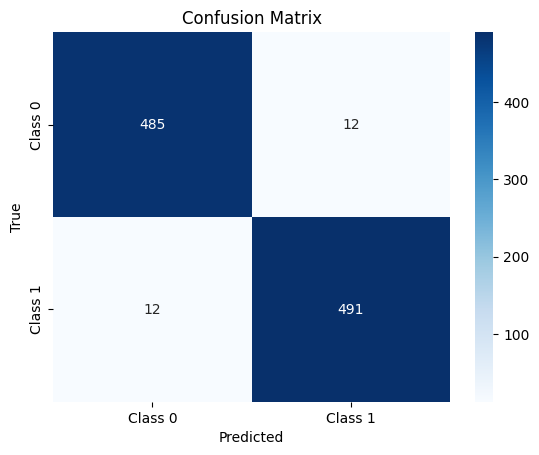

In [8]:
# Построение графика качества
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', label='Accuracy per fold')
plt.axhline(np.mean(scores), color='r', linestyle='--', label=f'Average Accuracy: {np.mean(scores):.2f}')

plt.title('Nested Cross-Validation Results')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

# Матрица ошибок
y_pred_all = cross_val_score(svc, X, y, cv=outer_cv)
cm = confusion_matrix(y, svc.fit(X, y).predict(X))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [7]:
#Вывод итогов:
print(f'Average Accuracy: {np.mean(scores):.2f}')
print('Classification Report:')

print(classification_report(y, svc.fit(X, y).predict(X)))

Average Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       497
           1       0.98      0.98      0.98       503

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

